In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = os.getcwd()
data = path + '/dataset/bank/bank-full.csv'
df = pd.read_csv(data, sep=';')
print(f'size of the data --> {df.shape}')
df.head()

size of the data --> (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# create table listing column types etc
df_info = pd.DataFrame([df.columns,df.dtypes, df.isna().sum(), df.nunique()])
df_info = df_info.T
df_info.columns = ['column','dtype','NA_count', 'unique_count']
print(f'check for duplicates --> {df.duplicated().sum()}')
df_info

check for duplicates --> 0


,column,dtype,NA_count,unique_count
0,age,int64,0,77
1,job,object,0,12
2,marital,object,0,3
3,education,object,0,4
4,default,object,0,2
5,balance,int64,0,7168
6,housing,object,0,2
7,loan,object,0,2
8,contact,object,0,3
9,day,int64,0,31


## Bank Client data:
1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual.

## Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

16 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Term Deposits


A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

In [6]:
def plot_bar(column, df):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = df[df['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = df[df['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

# Distribution of categorical

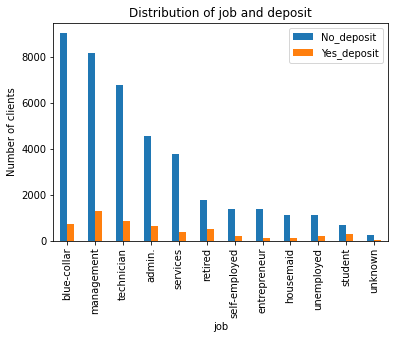

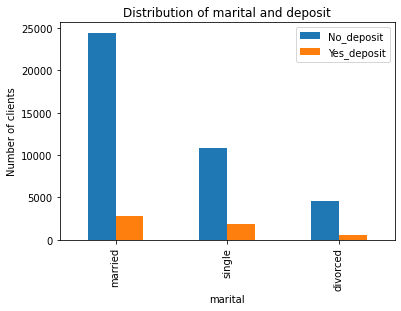

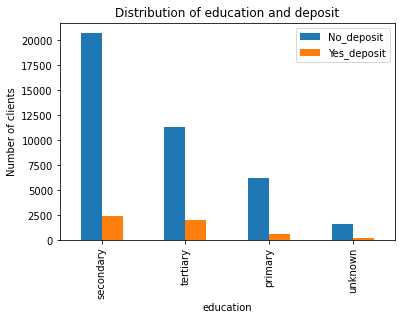

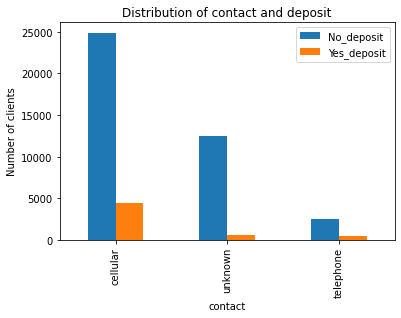

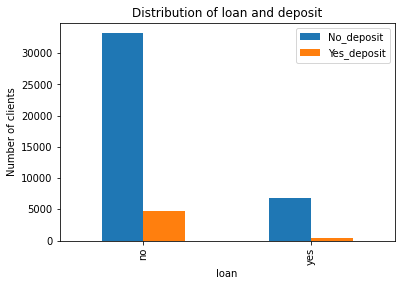

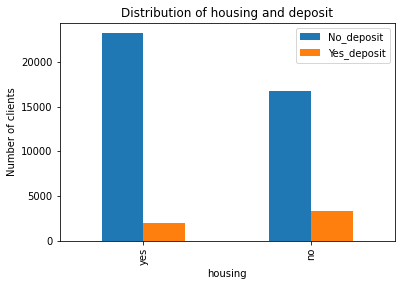

(None, None, None, None, None, None)

In [7]:
plot_bar('job', df), plot_bar('marital', df), plot_bar('education', df), plot_bar('contact', df), plot_bar('loan', df), plot_bar('housing', df)

# Distribution of numeric data

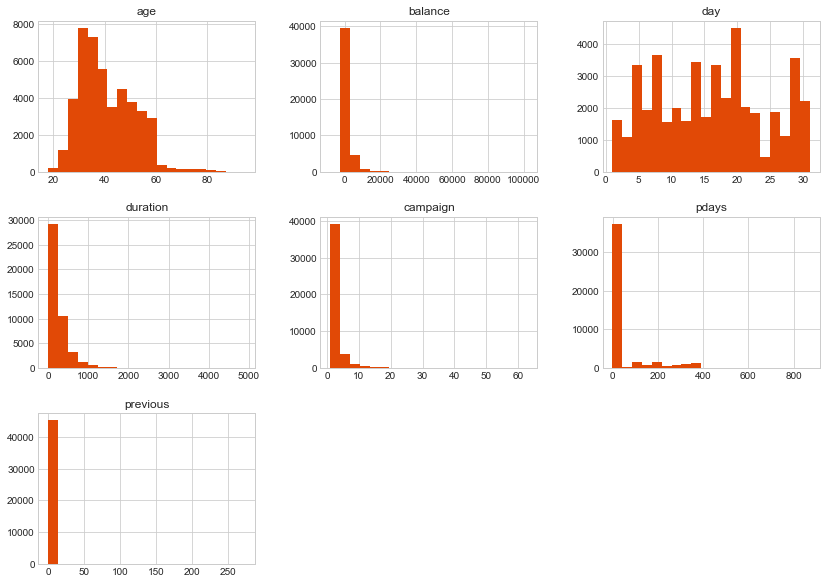

In [8]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

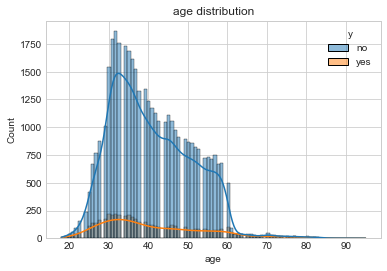

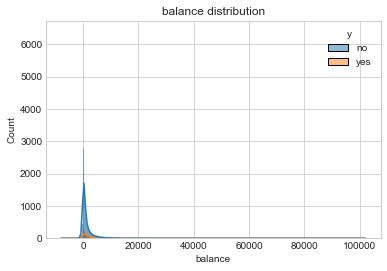

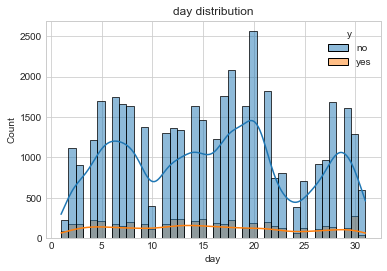

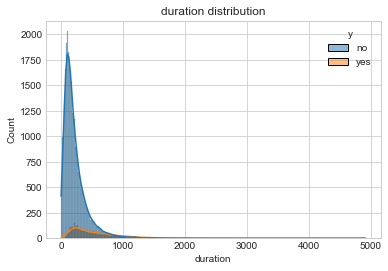

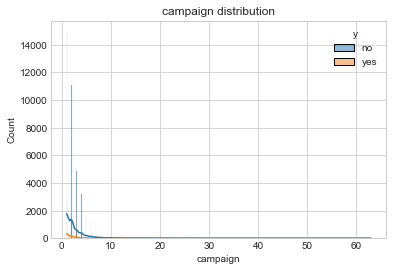

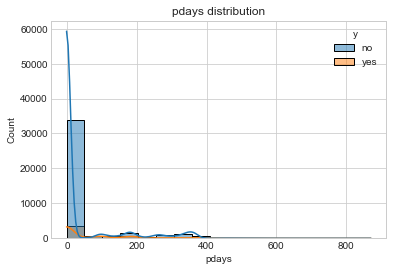

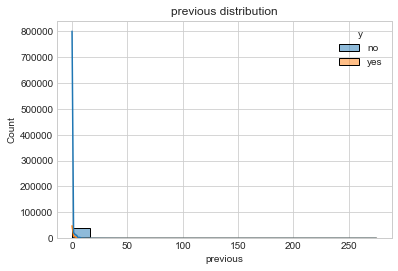

In [9]:
for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64':
        sns.histplot(x = df[c], hue = df['y'], kde = True)
        plt.title(f'{c} distribution')
        plt.show()

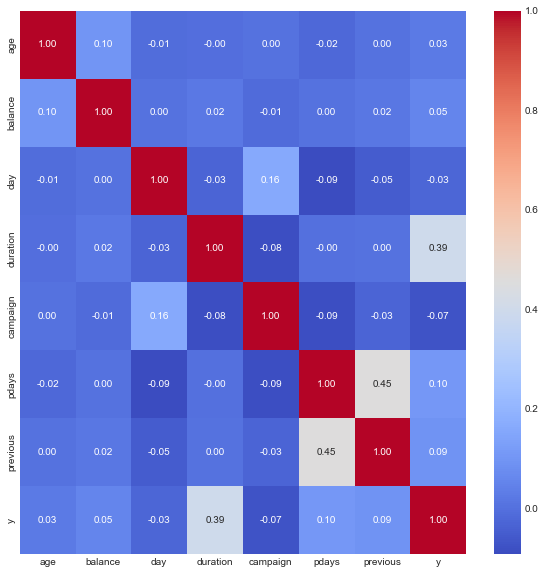

In [11]:
# Convert target variable into numeric
data = df.copy()
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')
# heatmap of correlations between numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()